## Problem 1: Sensors implementation
In `chap7/mav_dynamics.py` implement the following functions:
* accelerometer
* gyro
* pressure
* magnetometer
* gps_error_trans_update
* gps
* calculate_sensor_readings

## Implementation Tips
### Generating normally distributed noise
Normally distributed noise with a given variance can be generated using the `numpy.random.normal` function call. Zero mean noise with a variance sigma could be generated as follows.
```
np.random.normal(0., sigma)
```

### Noise Scale - Turning the noise on and off
Note that each of these functions has an input parameter named `noise_scale`. This parameter is used to turn on and off the noise. Whenever you are calculating noise, multiply the noise term by the `noise_scale` so that the unit test can turn it off. For example, the $x$ value of the gyro should be calculated as
```
gyro_x = p + SENSOR.gyro_x_bias + noise_scale * np.random.normal(0., SENSOR.gyro_sigma)
```
### Magnetometer calculation
The book brings up a magnetometer, but does not describe its details. Half of the magnetometer code is provided for you. Use your knowledge of transforms to convert the inertial frame magnetometer reading to body frame and then add white noise with a variance `SENSOR.mag_sigma` to each axis.

### GPS calculation
Note that the GPS velocity and course angle measurements can be calculated using the inputs available to you. Equations (7.21) and (7.22) with additive noise should be very useful. The variance of the noise is given as the constants `SENSOR.gps_Vg_sigma` and `SENSOR.gps_course_sigma` (i.e., ignore (7.24) ).

### Tips for calculate_sensor_readings(...)
When implementing `calculate_sensor_readings`, populate the `sensors` and `nu_update` variables using the other functions implemented. Determine the appropriate inputs to those functions and extract them from the inputs to the `calculate_sensor_readings` function. Also, only update the gps transient and sensor measurement inside the `if` statement. Leave the `else` statement alone. The purpose of the `if-else` statement is to simulate that GPS is not received as fast as the other measurements.

Initializing mav_view
Initializing data_view
Initializing data_view


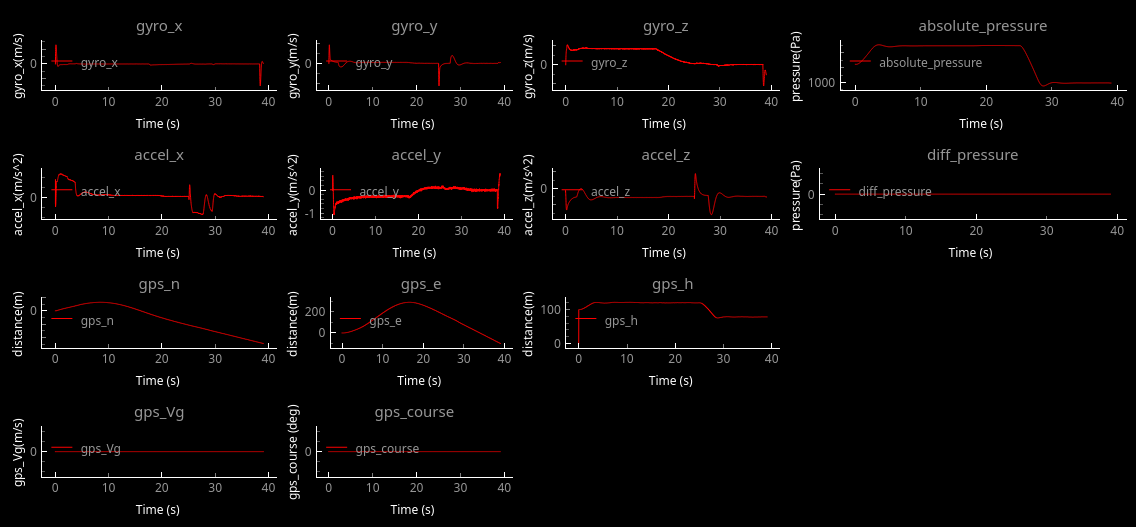

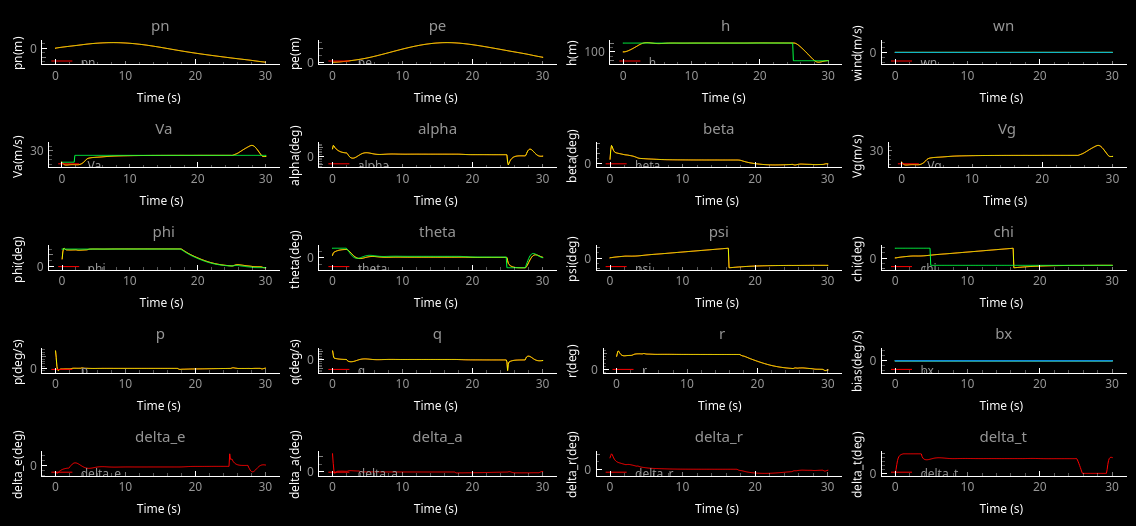

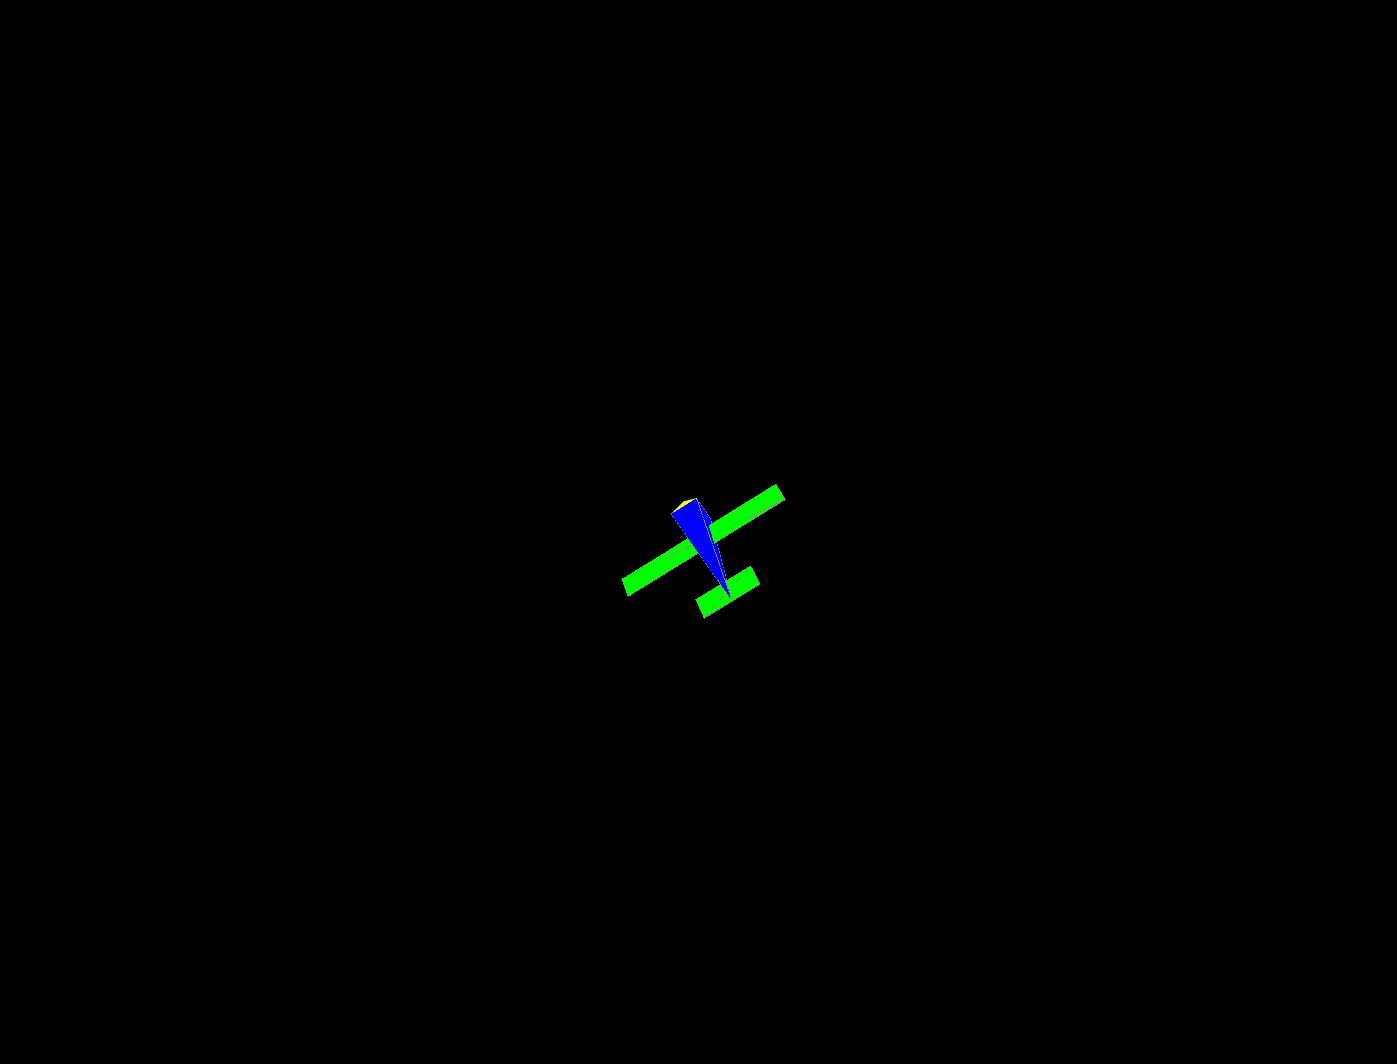

In [1]:
# Note that this cell can be run separately to initialize for other cell blocks
import numpy as np
from mav_sim.chap3.mav_dynamics import DynamicState
from mav_sim.chap7.run_sim import run_sim
from mav_sim.chap7.sensor_viewer import SensorViewer
from mav_sim.message_types.msg_sim_params import MsgSimParams
from mav_sim.tools.signals import Signals
from mav_sim.chap2.mav_viewer import MavViewer
from mav_sim.chap3.data_viewer import DataViewer
from mav_sim.tools.display_figures import display_data_view, display_mav_view
import mav_sim.parameters.aerosonde_parameters as MAV

# The viewers need to be initialized once due to restart issues with qtgraph
if 'mav_view' not in globals():
    print("Initializing mav_view")
    global mav_view
    mav_view = MavViewer()  # initialize the mav viewer
if 'data_view' not in globals():
    print("Initializing data_view")
    global data_view
    data_view = DataViewer()  # initialize view of data plots
if 'sensor_view' not in globals():
    print("Initializing data_view")
    global sensor_view
    sensor_view = SensorViewer()  # initialize view of data plots

# Initialize state values
sim_params = MsgSimParams(end_time=40., video_name="chap4.avi") # Sim ending in 10 seconds
state = DynamicState()

# Define nominal commands
Va_command_nom = Signals(dc_offset=25.0,
                        amplitude=3.0,
                        start_time=2.0,
                        frequency=0.01)
altitude_command_nom = Signals(dc_offset=100.0,
                        amplitude=20.0,
                        start_time=0.0,
                        frequency=0.02)
course_command_nom = Signals(dc_offset=np.radians(180),
                        amplitude=np.radians(45),
                        start_time=5.0,
                        frequency=0.015)

# Function for running simulation and displaying results
def run_sim_and_display(Va_command: Signals = Va_command_nom, altitude_command: Signals = altitude_command_nom, \
        course_command: Signals = course_command_nom):
    global mav_view
    global data_view
    global sensor_view
    data_view.reset(sim_params.start_time)
    (mav_view, data_view, sensor_view) = run_sim(sim=sim_params, init_state=state, mav_view=mav_view, data_view=data_view, sensor_view=sensor_view, \
        Va_command=Va_command, altitude_command=altitude_command, course_command=course_command) 
    display_data_view(sensor_view)
    display_data_view(data_view)
    display_mav_view(mav_view)
    
# Run a controlled trajectory
run_sim_and_display()

## Simple code checking
The following code does not need to change. It should just be used as a sanity check so that you know the code is implemented properly. The output should not have any lines reading `Failed test!`

In [2]:
from mav_sim.unit_tests.ch7_sensors_test import run_all_tests
run_all_tests()

Starting accelerometer test
End of test

Starting gyro test
End of test

Starting pressure test
End of test

Starting magnometer test
End of test

Starting gps_error_trans_update test
End of test

Starting gps test
Failed test!
Calculated output:
(-1025.0, -1025.0, 975.0, 70.71067811865476, -2.356194490192345)
Expected output:
(-1025.0, -1025.0, 975.0, 70.71067811865476, 0.643805509807655)
Difference:


TypeError: unsupported operand type(s) for -: 'tuple' and 'tuple'